Q1. Using the given sample time series data, plot the data points on a line graph. Identify and  describe any visible trends (e.g., upward, downward, or cyclical patterns) over time. What does  the trend suggest about the underlying process?


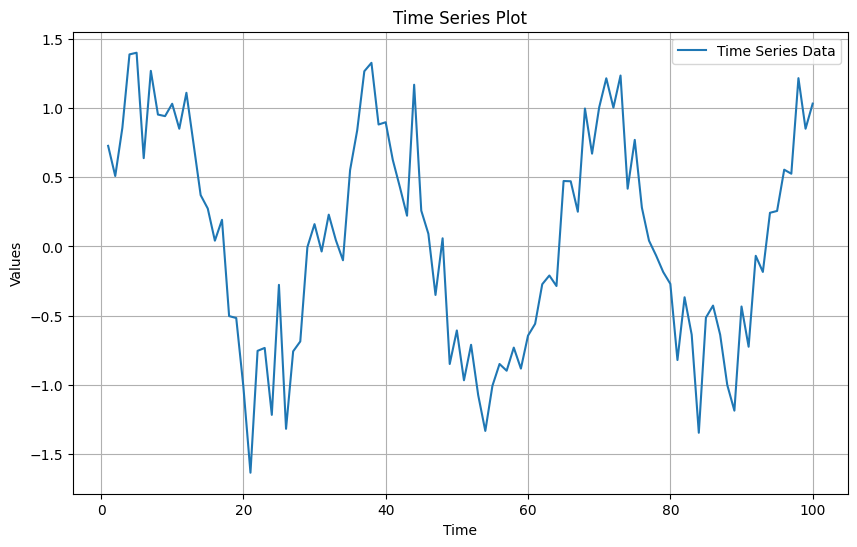

<ipython-input-1-9dda8890c4aa>:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series = pd.Series(values, index=pd.date_range(start='2023-01-01', periods=100, freq='M'))


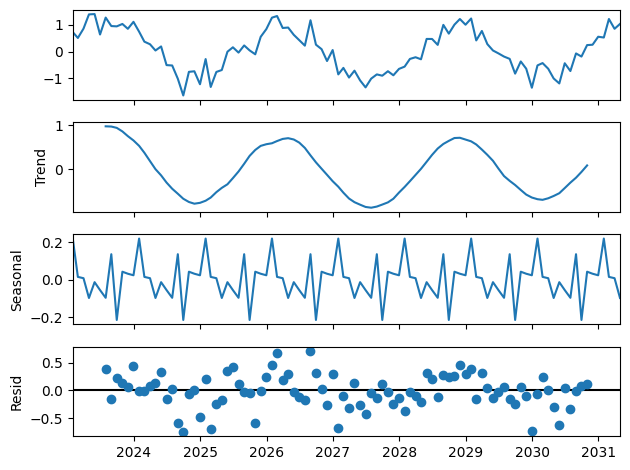

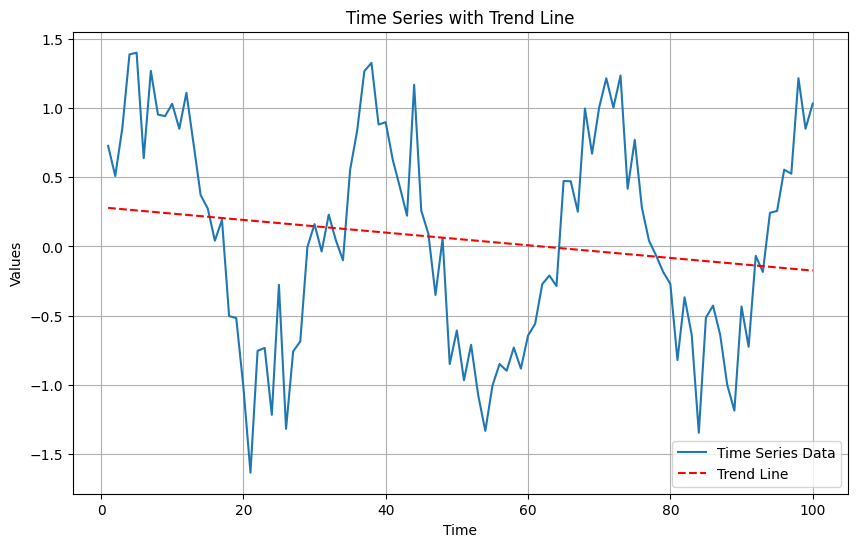

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
np.random.seed(0)
time = np.arange(1, 101)
values = np.sin(time * 0.2) + np.random.normal(0, 0.3, size=100)

data = pd.DataFrame({'Time': time, 'Values': values})

plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Values'], label='Time Series Data')
plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)
plt.legend()
plt.show()

time_series = pd.Series(values, index=pd.date_range(start='2023-01-01', periods=100, freq='M'))

decomposition = seasonal_decompose(time_series, model='additive', period=12)
decomposition.plot()
plt.show()

from sklearn.linear_model import LinearRegression
X = data['Time'].values.reshape(-1, 1)
y = data['Values'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Values'], label='Time Series Data')
plt.plot(data['Time'], y_pred, color='red', linestyle='--', label='Trend Line')
plt.title('Time Series with Trend Line')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)
plt.legend()
plt.show()


Q2.Perform an autocorrelation analysis on the time series data. Create a correlogram (plot of  autocorrelation function). Identify the significant lags in the data and explain their meaning.  How do these lags impact the interpretation of the time series?

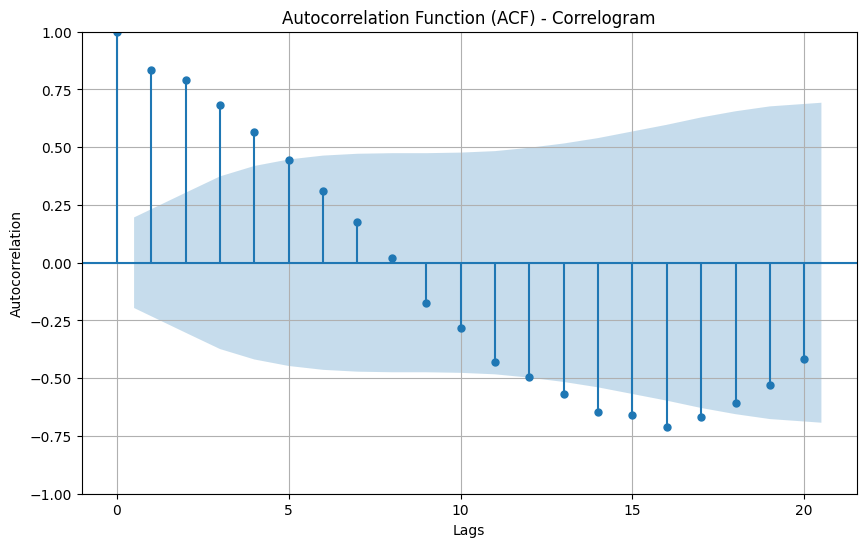

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

np.random.seed(0)
time = np.arange(1, 101)
values = np.sin(time * 0.2) + np.random.normal(0, 0.3, size=100)
data = pd.DataFrame({'Time': time, 'Values': values})

time_series = pd.Series(data['Values'])
plt.figure(figsize=(10, 6))
plot_acf(time_series, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Correlogram')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


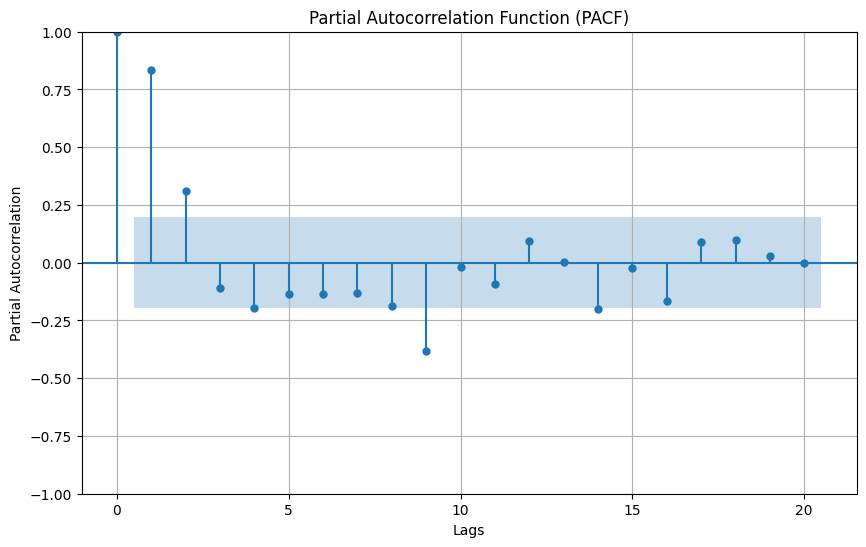

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(10, 6))
plot_pacf(time_series, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()


Q3.Write a Python program using Matplotlib or Plotly to plot the provided time series data points.  The x-axis should represent time, and the y-axis should represent the data values. Customize  the graph with labels, a title, and gridlines. (Hint: Use plt.plot() in Matplotlib or px.line() in Plotly.)

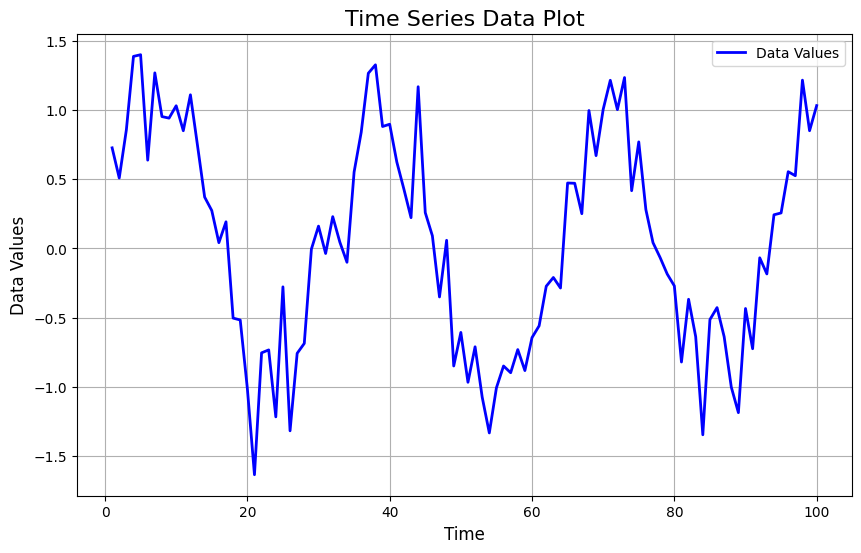

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
time = np.arange(1, 101)
values = np.sin(time * 0.2) + np.random.normal(0, 0.3, size=100)

plt.figure(figsize=(10, 6))
plt.plot(time, values, label='Data Values', color='blue', linewidth=2)

plt.title('Time Series Data Plot', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Data Values', fontsize=12)
plt.grid(True)
plt.legend()

plt.show()


In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
np.random.seed(0)
time = np.arange(1, 101)
values = np.sin(time * 0.2) + np.random.normal(0, 0.3, size=100)
data = pd.DataFrame({'Time': time, 'Values': values})

fig = px.line(data, x='Time', y='Values', title='Time Series Data Plot')

fig.update_layout(
    xaxis_title='Time',
    yaxis_title='Data Values',
    template='plotly_white'
)

fig.show()


Q4. Using the statsmodels library, write a program to perform an additive decomposition of a time  series into trend, seasonal, and residual components. Display each component as a separate plot.  (Hint: Use seasonal_decompose() from statsmodels.tsa.seasonal.)

<ipython-input-6-5a3ed3977b92>:8: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



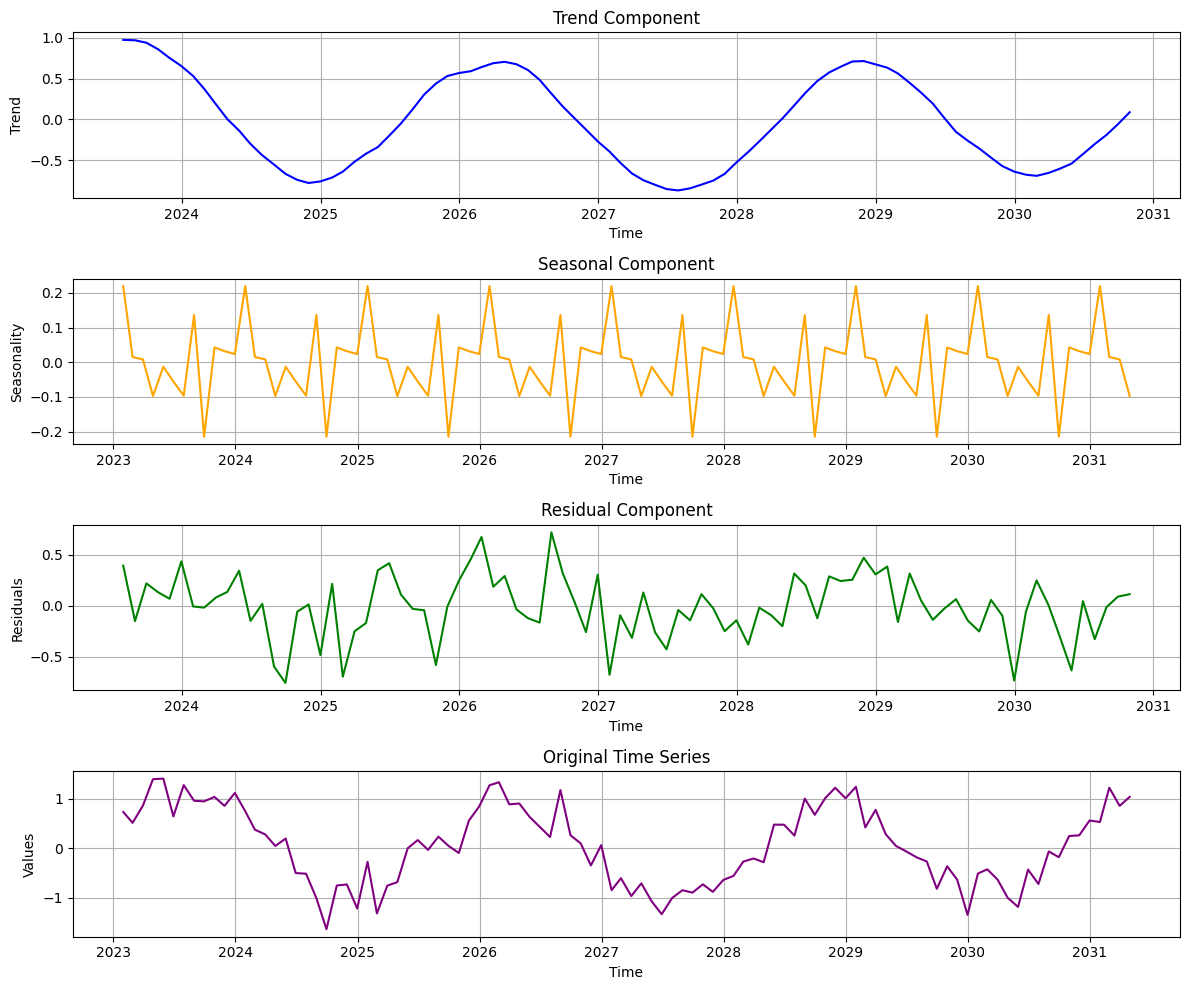

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
np.random.seed(0)
time = np.arange(1, 101)
values = np.sin(time * 0.2) + np.random.normal(0, 0.3, size=100)
data = pd.Series(values, index=pd.date_range(start='2023-01-01', periods=100, freq='M'))

decomposition = seasonal_decompose(data, model='additive', period=12)
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.title('Trend Component')
plt.xlabel('Time')
plt.ylabel('Trend')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal, label='Seasonal', color='orange')
plt.title('Seasonal Component')
plt.xlabel('Time')
plt.ylabel('Seasonality')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(decomposition.resid, label='Residual', color='green')
plt.title('Residual Component')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(data, label='Original Data', color='purple')
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)

plt.tight_layout()
plt.show()
